# Imports

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date, time

# Load bike dataset

In [2]:
df_chicago = pd.read_csv('../dataset/chicago_2018_clean.csv') 
df_chicago

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_per_trip,trip_time_in_hours
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber,0 days 00:08:19,0.138611
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber,0 days 00:20:25,0.340278
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer,0 days 00:16:00,0.266667
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber,0 days 00:07:14,0.120556
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber,0 days 00:11:49,0.196944
...,...,...,...,...,...,...,...,...,...,...
3599456,2018-03-31 23:46:34,2018-04-01 00:05:24,158,260,Milwaukee Ave & Wabansia Ave,Kedzie Ave & Milwaukee Ave,1935,Subscriber,0 days 00:18:50,0.313889
3599457,2018-03-31 23:47:43,2018-03-31 23:52:05,299,229,Halsted St & Roscoe St,Southport Ave & Roscoe St,5852,Subscriber,0 days 00:04:22,0.072778
3599458,2018-03-31 23:50:18,2018-03-31 23:57:38,327,226,Sheffield Ave & Webster Ave,Racine Ave & Belmont Ave,4414,Subscriber,0 days 00:07:20,0.122222
3599459,2018-03-31 23:52:26,2018-04-01 00:07:13,265,426,Cottage Grove Ave & Oakwood Blvd,Ellis Ave & 60th St,6448,Subscriber,0 days 00:14:47,0.246389


In [3]:
#Convert into datetime objects
df_chicago['Time'] = pd.to_datetime(df_chicago['start_time']).dt.time
df_chicago["Hour"] = pd.to_datetime(df_chicago["start_time"]).dt.hour
df_chicago["Month"]= pd.to_datetime(df_chicago["start_time"]).dt.month
df_chicago["Weekday"]= pd.to_datetime(df_chicago["start_time"]).dt.dayofweek
df_chicago['Day'] = pd.to_datetime(df_chicago['start_time']).dt.date
df_chicago["Day"]= pd.to_datetime(df_chicago["Day"])

# KPI Definition

To cover the demand of bikes, we take a two-step look at the utilization of bike rental patterns evolves throughout the day. <br> In the first step, we differentiate between the different user types to see which of the customer segments demonstrates a higher demand over the day on average. In the second step, we look at the number of available bikes per hour to avoid potential bottlenecks and thus have an indicator that represents the peak times of bikes during a day on average. <br> This KPI represents as a fundamental base the temporal utilization and is again concretized with the building up KPI's, at which localities at which time the demand is highest, so that DivyBikes receives an overview of the utilization on the day for different locations.


## Average Total Daily Trips per Bike by User_Type

In [4]:
df_chicago.groupby("user_type").count()["start_time"].sort_values()

user_type
Customer       674995
Subscriber    2924466
Name: start_time, dtype: int64

2 different user_types exist. We split them into 'Subscriber' and 'Customer' and present how many total bike_trips took place during a day on a average basis.

In [5]:
df_subscriber = df_chicago[df_chicago['user_type'] == "Subscriber"]
df_customer = df_chicago[df_chicago['user_type'] == "Customer"]

## Average Total Daily Trips per Bike

In [6]:
total_bike_trips_per_day = df_chicago.groupby(['Day'])['bike_id'].count()
avg_total_bike_trips_per_day = total_bike_trips_per_day.mean()
avg_total_bike_trips_per_day

9861.53698630137

On average, nearly 9862 trips are made per day.

## Average Total Daily Trips per Bike (Customer)

In [7]:
total_bike_trips_customer = df_customer.groupby(['Day'])['bike_id'].count()
avg_total_bike_trips_customer = total_bike_trips_customer.mean()
avg_total_bike_trips_customer

1849.3013698630136

Out of the 9862 trips, on average 1849 trips are performed by customers on a daily basis.

## Average Total Daily Trips per Bike (Subscriber)

In [8]:
total_bike_trips_subscriber = df_subscriber.groupby(['Day'])['bike_id'].count()
avg_total_bike_trips_subscriber = total_bike_trips_subscriber.mean()
avg_total_bike_trips_subscriber

8012.235616438356

From the 9862 trips in total average, 8012 trips are performed by subscribers on a daily basis. Here, we can say that subscribers are these kind of user_types, which are taking more trips compared to customers.

## Average Availability of Bikes per Hour


Since we calculate the average daily trips per bike, it is important to estimate the amount of available bikes during a day. Therefore, we look how many bikes are available on an hourly basis. With this, DivyBikes gets a better understanding about their peaking times related to the amount of bikes.

Text(0, 0.5, 'Available Bikes')

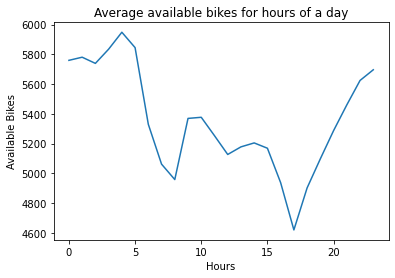

In [9]:
#Calculate the average availability of bikes during a Day
def func (x1):
    y = df_chicago.bike_id.nunique()/x1
    return y

y = df_chicago[["Hour","Day","bike_id"]]
z = y.groupby(["Hour", "Day", "bike_id"])["bike_id"].count().groupby(["Hour"]).mean()
z = z.apply(func)

#Plot the function
ax = z.plot(title ="Average available bikes for hours of a day")
ax.set_xlabel("Hours")
ax.set_ylabel("Available Bikes")

Based on the plot, we can conclude some statements about the availability of bikes. From midnight to 5am, bikes are available in large quantities. After 6am to 8am, many bikes are used, so the availability is quite low. However, between 9am to 3pm, more bicycles are available. Then, between 4pm to 5pm, availability is the lowest, as that is the time range where most rides are made. Lastly, from 6pm to 11pm, the availability rate increases very high. Here we can once again accept our assumption that the demand of bicycles is mainly taken up as a mobility service to get to work/school.

In [10]:
#Show available bikes per Hour as list
def func (x1):
    y = df_chicago.bike_id.nunique()/x1
    return y

y = df_chicago[["Hour","Day","bike_id"]]
z = y.groupby(["Hour", "Day", "bike_id"])["bike_id"].count().groupby(["Hour"]).mean()
z = z.apply(func)
z

Hour
0     5759.463439
1     5780.491709
2     5739.013923
3     5834.367753
4     5948.237860
5     5844.939717
6     5329.646207
7     5061.958140
8     4958.346422
9     5369.238326
10    5376.796512
11    5253.153823
12    5126.927239
13    5178.001596
14    5204.531411
15    5168.858297
16    4937.176702
17    4619.968978
18    4902.309647
19    5097.868224
20    5287.130316
21    5460.159520
22    5624.296425
23    5696.054602
Name: bike_id, dtype: float64